# Imports

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#pip install rfpimp - permutation e drop column feature importance

# Data Loading

In [27]:
co2 = pd.read_csv("owid-co2-data.csv")

In [28]:
co2.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


Os dados fazem partes dos relatórios gerados e disponibilizados no site 'ourworldindata.org'. Os dados são relativos à emissão de CO2 e outros gases estufa pelos países ao longo dos anos e principais fontes responsáveis.

# Investigação estrutural

### Registros e colunas

In [29]:
co2.shape 

(25191, 60)

### Tipos de dados

In [30]:
pd.value_counts(co2.dtypes)

float64    57
object      2
int64       1
dtype: int64

## Análise de features Object

In [54]:
co2[co2.dtypes[(co2.dtypes == 'object')].index]

,iso_code,country
0,AFG,Afghanistan
1,AFG,Afghanistan
2,AFG,Afghanistan
3,AFG,Afghanistan
4,AFG,Afghanistan
...,...,...
25186,ZWE,Zimbabwe
25187,ZWE,Zimbabwe
25188,ZWE,Zimbabwe
25189,ZWE,Zimbabwe


As colunas object correspondem ao nome e abreviação do país analisado

In [64]:
co2.describe(exclude = 'number')

,iso_code,country
count,21960,25191
unique,219,243
top,OWID_WRL,EU-28
freq,271,271


## Numerical features

In [57]:
#Análise de colunas int
co2[co2.dtypes[(co2.dtypes == 'int64')].index].head()

,year
0,1949
1,1950
2,1951
3,1952
4,1953


In [75]:
#Análise de colunas float
co2[co2.dtypes[(co2.dtypes == 'float64')].index].head()

,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,0.015,0.002,NaN,NaN,NaN,0.015,0.002,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,0.084,0.011,NaN,NaN,NaN,0.021,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,0.092,0.012,NaN,NaN,NaN,0.026,0.003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,0.092,0.012,NaN,NaN,NaN,0.032,0.004,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,0.106,0.013,NaN,NaN,NaN,0.038,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


A maior parte dos dados é do tipo float, contendo os números relativos a cada país. Aparenta ter valores faltantes.

### Verificação de possíveis features binárias ordinais e contínuas

In [73]:
unique_val = co2.select_dtypes(include = 'number').nunique().sort_values()

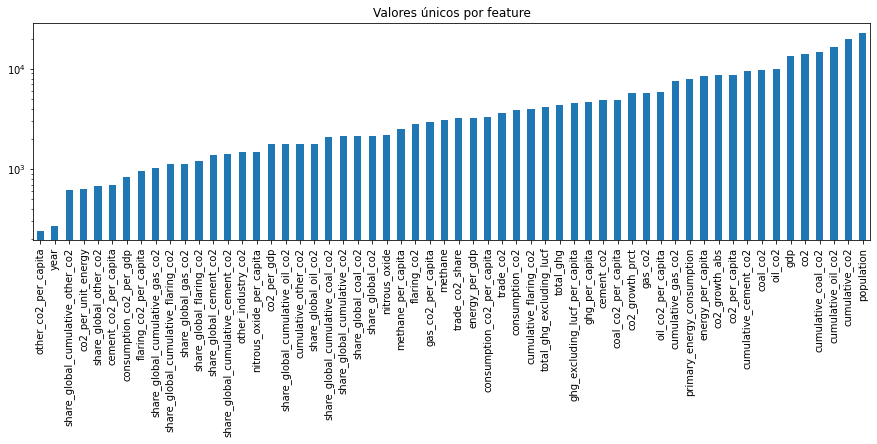

In [72]:
unique_val.plot.bar(logy = True, 
                    figsize = (15,4), 
                    title = 'Valores únicos por feature')
plt.show()

 A quantidade de valores únicos em cada feature parece indicar que todas as features presentes são contínuas

Para possível análise de variação temporal, convertemos a variável year de numérica para data

In [78]:
co2.year = co2.year.apply(lambda x: str(x)+'-01-01')

In [79]:
co2.year = pd.to_datetime(co2.year)

In [82]:
round(co2.describe(),2)

,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,23949.00,23307.00,3976.00,12248.00,12218.00,17188.00,16860.00,4382.00,4381.00,8845.00,...,5651.00,5655.00,5655.00,5655.00,5655.00,2.289200e+04,1.353800e+04,8690.00,8681.00,6803.00
mean,267.86,4.17,-2.42,12.89,0.11,175.36,1.55,15.00,0.88,108.75,...,6.87,79.07,1.90,29.09,0.60,7.068041e+07,2.877088e+11,1569.08,25568.49,1.85
std,1521.68,14.91,182.44,77.26,0.15,786.11,2.55,40.47,5.48,441.06,...,7.27,545.01,3.32,198.15,0.89,3.794737e+08,2.180094e+12,9066.10,33319.96,1.58
min,0.00,0.00,-1658.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.10,0.00,0.00,0.00,0.00,1.490000e+03,5.543200e+07,0.00,0.00,0.05
25%,0.53,0.25,-0.89,0.13,0.02,0.32,0.05,0.25,0.02,0.38,...,2.10,2.00,0.69,0.51,0.22,1.287425e+06,9.828867e+09,7.00,3270.37,0.86
50%,4.86,1.25,1.95,0.56,0.07,3.98,0.44,2.07,0.07,4.20,...,4.44,8.53,1.08,3.46,0.38,4.869928e+06,3.037019e+10,61.40,13701.32,1.41
75%,42.82,4.66,9.70,2.90,0.16,35.53,2.15,12.60,0.20,30.83,...,8.98,30.02,1.62,11.20,0.59,1.757624e+07,1.268944e+11,352.88,35493.78,2.35
max,36702.50,748.64,1028.49,1626.37,2.74,15062.90,34.18,435.03,94.71,7553.39,...,53.65,8298.27,39.80,3078.27,10.06,7.794799e+09,1.136302e+14,162194.29,317582.50,13.49
